# logistic regression using python

This is a project created based on the one explained in https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/, in order to implement a step-by-step logistic regression process with the objective of comparing its performance with that of specialized sklearn libraries for linear regression to verify the differences and implement new strategies for a better result with the use of optimizers.

##Dataset Used

The dataset used is a compilation of the different attributes that can influence the possibility of suffering a heart attack, these attributes are:

* years
* sex
* type of chest pain (4 values)
* resting blood pressure
* serum cholesterol in mg/dl
* Fasting blood sugar > 120 mg/dl
* electrocardiographic results at rest (values ​​0,1,2)
* maximum heart rate reached
* exercise-induced angina
* oldpeak = exercise-induced ST depression relative to rest
* the slope of the maximal exercise ST segment
* number of main vessels (0-3) stained by fluoroscopy

In this way, the use of this dataset is important, because it is one of the most frequent causes of death in the world and working with it can help to carry out prediction projects, something that could be very important for remote medical applications, due to to which a person could estimate for himself if he can have the possibility of having a heart attack from anywhere in the world.

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

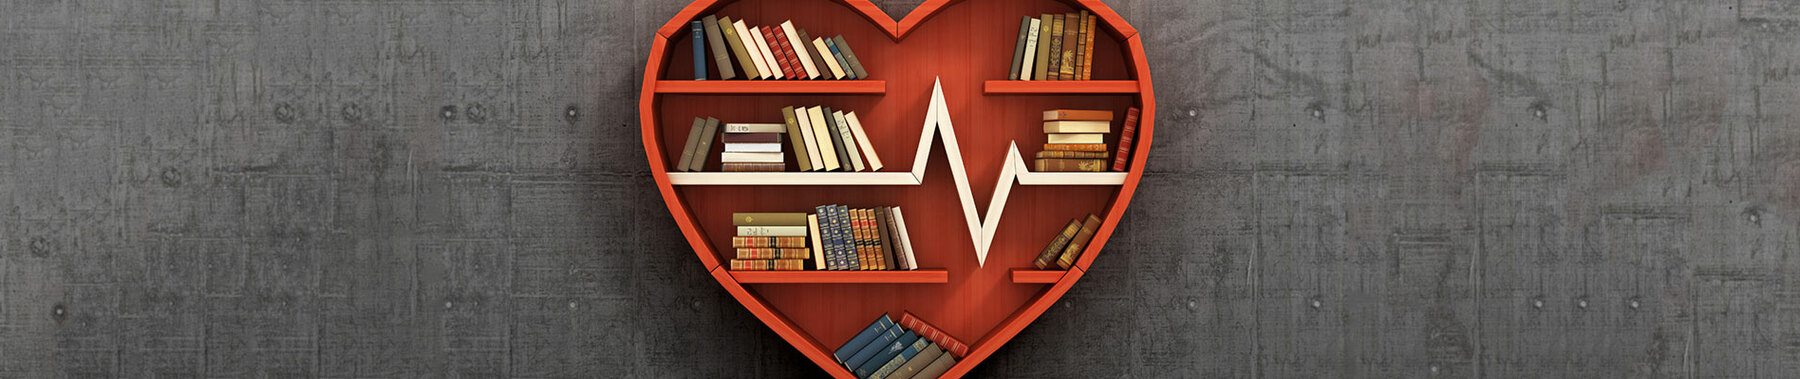

##Logistic regression process

In [ ]:

# We import modules to use

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import copy

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# We load the dataset 

df_heart=pd.read_csv("/content/drive/MyDrive/ESPECIALIZACION IA/PRIMER SEMESTRE/HERRAMIENTAS MATEMATICAS Y COMPUTACIONALES/PARCIAL FINAL/PUNTO 2/heart.csv")

df_heart.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

# We separate the inputs from the outputs and divide into training and validation data

x=df_heart.iloc[:,:12]

y=df_heart.iloc[:,13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train:" + str(x_train.shape) + "\t x_test:" + str(x_test.shape))
print("y_train:" + str(y_train.shape) + "\t\t y_test:" + str(y_test.shape))


x_train:(242, 12)	 x_test:(61, 12)
y_train:(242,)		 y_test:(61,)


In [ ]:

# We create the LogisticRegression class to obtain each of the functions we need from it

class CustomLogisticRegression():

    def __init__(self):

        self.losses = []
        self.train_accuracies = []

        self.sw=0

        self.sb=0

    def fit(self, x, y, epochs,op):

        w=[]

        x = self._transform_x(x)
        y = self._transform_y(y)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0
        self.s=0

        for i in range(epochs):
          
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)

            error_w, error_b = self.compute_gradients(x, y, pred)

            w.append(self.weights[0])

            self.sw+=error_w**2

            self.sb+=error_b**2

            self.update_model_parameters(error_w, error_b,op)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b,op):

      if op=="CG":

        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

      elif op=="AdaGrad":

        self.weights=self.weights-((0.1*error_w)/np.sqrt((self.sw+10e-10)))

        self.bias=self.bias-((0.1*error_b)/np.sqrt((self.sb+10e-10)))

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)


In [ ]:

# We create an object of the CustomLogisticRegression class

lr = CustomLogisticRegression()

# We train the logistic regression model with the training data for 150 epochs.

lr.fit(x_train, y_train, epochs=150,op="CG")


In [ ]:

# We create the prediction of the trained model with the test data

pred = lr.predict(x_test)

# We calculate the accuracy of the model

accuracy = accuracy_score(y_test, pred)
print(accuracy)


0.7377049180327869


([<matplotlib.axis.YTick at 0x7f161fff91d0>,
 <a list of 2 Text major ticklabel objects>)

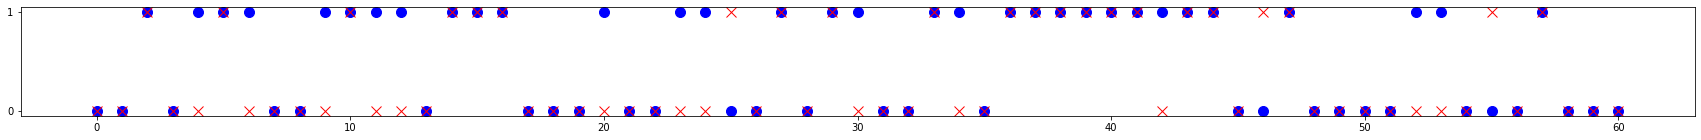

In [ ]:

plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(pred)), pred, 'rx', markersize=10)
plt.yticks([0,1])


#Implementation with sklearn

In [ ]:

# Now we compare the results with those of the Sklearn LogisticRegression library

model = LogisticRegression(solver='newton-cg', max_iter=150)

model.fit(x_train, y_train)

pred2 = model.predict(x_test)
accuracy2 = accuracy_score(y_test, pred2)
print(accuracy2)


0.8360655737704918


([<matplotlib.axis.YTick at 0x7f161f04bbd0>,
 <a list of 2 Text major ticklabel objects>)

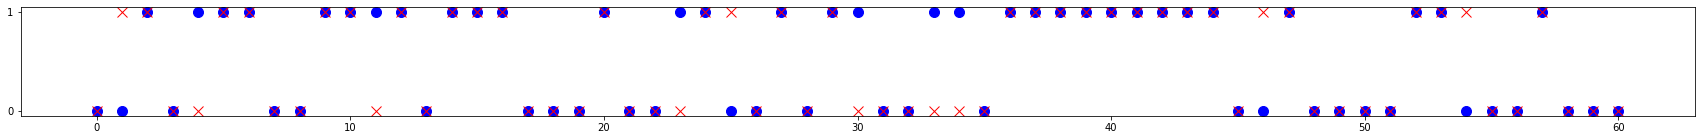

In [ ]:

plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(pred2)), pred2, 'rx', markersize=10)
plt.yticks([0,1])


# New optimizer implementation

In [ ]:

# Now we implement the second optimizer, in this case AdaGrad

lr2 = CustomLogisticRegression()

# We train the logistic regression model with the training data for 150 epochs.

lr2.fit(x_train, y_train, epochs=150,op="AdaGrad")

# We create the prediction of the trained model with the test data

pred3 = lr2.predict(x_test)

# We calculate the accuracy of the model

accuracy2 = accuracy_score(y_test, pred2)
print(accuracy2)


0.8360655737704918


([<matplotlib.axis.YTick at 0x7f161ef53c90>,
 <a list of 2 Text major ticklabel objects>)

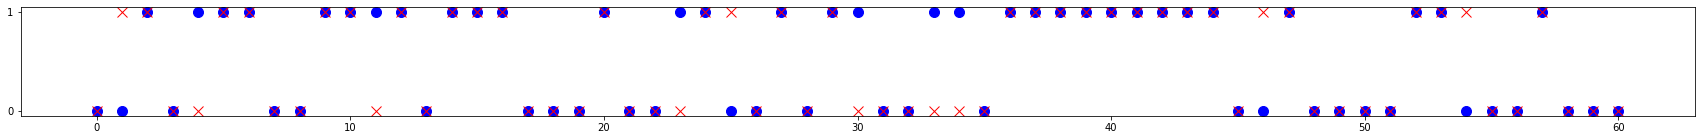

In [ ]:

plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(pred3)), pred3, 'rx', markersize=10)
plt.yticks([0,1])

